# ЗАДАНИЕ

Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)

my_awesome_tree = DecisionTreeClassifier(...)

или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [103]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
np.random.seed(0)

In [7]:
iris_data = pd.read_csv(r'C:\Audiobooks\ForDS\Iris\train_iris.csv')

In [8]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [9]:
iris_data.species.unique()

array([2, 0, 1], dtype=int64)

In [10]:
iris_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [11]:
X = iris_data.drop(['Unnamed: 0', 'species'], axis=1)
y = iris_data.species

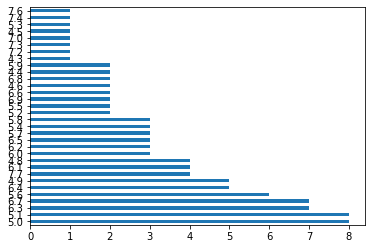

In [12]:
##### Просто для примера, как это сделать
# Рассмотрим распределение классов билетов
X['sepal length'].value_counts().plot.barh();


In [13]:
y.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

# ОБУЧАЕМ решающее дерево

## 1 Разбить выборку на обуч и тестовую

In [14]:
X_train, y_train = X, y

## 2 Подбор глубины дерева

In [15]:
max_depth_values = range(1, 100)

In [ ]:
#clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
#cross_val_score(clf, X_train, y_train, cv=5).mean()

## Скачаем тестовые данные

In [16]:
test_data = pd.read_csv(r'C:\Audiobooks\ForDS\Iris\test_iris.csv')

In [17]:
test_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [18]:
X_test = test_data.drop(['Unnamed: 0', 'species'], axis=1)
y_test = test_data.species


###  наш цикл

In [27]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    # вычисляем аккуратность предсказаний (accuracy_score) на тестовом датасэте
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'test_score': [test_score]})

    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [22]:
scores_data.isnull().sum()

max_depth      0
train_score    0
test_score     0
dtype: int64

In [23]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'test_score'],\
                          var_name='set_type', value_name='score')

'''scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'test_score', 'mean_cross_val_score'],\
                          var_name='set_type', value_name='score')'''

"scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],                            value_vars=['train_score', 'test_score', 'mean_cross_val_score'],                          var_name='set_type', value_name='score')"

In [25]:
# Посмотрим, как выглядят данные сейчас
scores_data_by_set_type = scores_data_long.groupby('set_type', as_index=False)
scores_data_by_set_type.head(3)

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
99,1,test_score,0.60
100,2,test_score,0.94
101,3,test_score,0.94


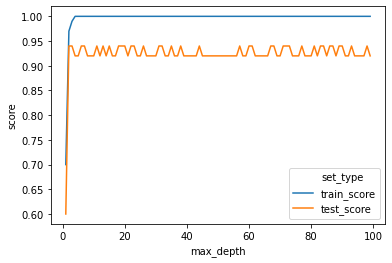

In [26]:
#sns.lineplot(x='max_depth', y='mean_cross_val_score', data=scores_data)
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

## Теперь возьмем наш лучший классификатор
## как мы выяснили, это при
# max_depth=3
## и протестим его на тестовых данных, которые он ни разу не видел

In [25]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
best_clf.fit(X_train, y_train)

test_data_score = best_clf.score(X_test, y_test)

In [26]:
test_data_score

0.94

## Точность нашего классификатора = 0.94

# Визуализация дерева

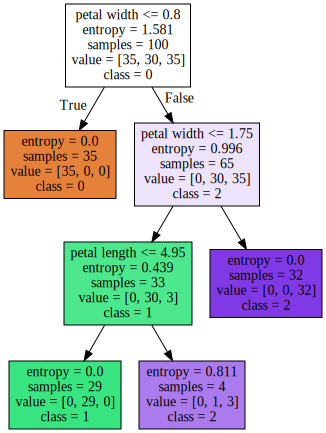

In [34]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, feature_names=list(X), \
                                    class_names=['0', '1', '2'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
#-------
#При какой глубине дерева усредненная точность предсказания >= 79%
#scores_data_long.query("set_type == 'mean_cross_val_score' & score >= 0.79") \
#    .sort_values(by='score', ascending=False)
# при max_depth=7 максимальный score

# ЗАДАНИЕ 2


Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

В задании допускается определённая погрешность.

P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from graphviz import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
%config IPCompleter.greedy=True

In [57]:
dogs_n_cats = pd.read_csv(r'C:\Audiobooks\ForDS\dogs_n_cats.csv')
dogs_n_cats.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик
999,11,4.4,1,0,1,котик


In [58]:
dogs_n_cats['Вид'].unique()

array(['собачка', 'котик'], dtype=object)

## Заменим котик/собачка на 1 / 0

In [59]:
dogs_n_cats.loc[:, 'Результат'] = dogs_n_cats['Вид'].map({'котик': 1, 'собачка': 0})

In [70]:
dogs_n_cats.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид,Результат
995,8,3.2,1,0,1,котик,1
996,7,2.8,1,0,1,котик,1
997,6,2.4,1,0,1,котик,1
998,7,2.8,1,0,1,котик,1
999,11,4.4,1,0,1,котик,1


In [61]:
dogs_n_cats.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
Результат             0
dtype: int64

In [73]:
X = dogs_n_cats.drop(['Вид', 'Результат'], axis=1)
y = dogs_n_cats['Результат']

## 1 Разбить выборку на обуч и тестовую

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train = X, y

## 2 Подбор глубины дерева

In [75]:
max_depth_values = range(1, 100)

In [76]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    # КРОССВАЛИДАЦИЯ
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})

    scores_data = scores_data.append(temp_score_data)

In [77]:
scores_data.head()

,max_depth,train_score,mean_cross_val_score
0,1,1.0,1.0
0,2,1.0,1.0
0,3,1.0,1.0
0,4,1.0,1.0
0,5,1.0,1.0


## Как видим, максимальная точность mean_cross_val_score - при max_depth=1

In [78]:
scores_data.isnull().sum()

max_depth               0
train_score             0
mean_cross_val_score    0
dtype: int64

In [80]:
'''scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'test_score'],\
                          var_name='set_type', value_name='score')'''

scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], \
                           value_vars=['train_score', 'mean_cross_val_score'],\
                          var_name='set_type', value_name='score')

In [81]:
# Посмотрим, как выглядят данные сейчас
scores_data_by_set_type = scores_data_long.groupby('set_type', as_index=False)
scores_data_by_set_type.head(3)

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
99,1,mean_cross_val_score,1.0
100,2,mean_cross_val_score,1.0
101,3,mean_cross_val_score,1.0


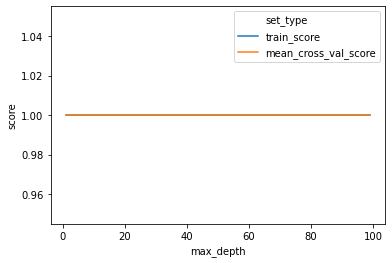

In [82]:
#sns.lineplot(x='max_depth', y='mean_cross_val_score', data=scores_data)
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

## Теперь возьмем наш лучший классификатор
## как мы выяснили, это при
# max_depth=3
## и протестим его на тестовых данных, которые он ни разу не видел

In [98]:
X_test = pd.read_json(r'C:\Audiobooks\ForDS\dataset_209691_15.txt')
X_test.tail()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
95,12,4.8,1,0,0
96,8,3.2,1,0,1
97,12,4.8,1,0,1
98,5,2.0,1,0,1
99,8,3.2,1,0,1


## Предскажем результат с помощью clf.predict()

In [99]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
best_clf.fit(X_train, y_train)

res = clf.predict(X_test)
#test_data_score = best_clf.score(X_test, y_test)

In [100]:
# Считаем количество 0, т.е. собак
np.count_nonzero(res==0)

41

In [101]:
res.size

100

# Визуализация дерева

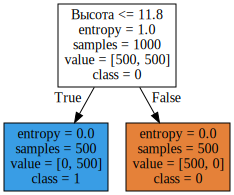

In [84]:
graph = Source(tree.export_graphviz(best_clf, out_file=None, feature_names=list(X), \
                                    class_names=['0', '1'], filled=True))
display(SVG(graph.pipe(format='svg')))

# ЗАДАНИЕ 3



Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

### 1 Обучите модель на тренировочных данных, 
### 2 предскажите авторов для тестовых и поместите в переменную predictions. 
### 3 Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, **потюньте немного модель.**

Исходные данные взяты отсюда, слегка процессированные можно взять здесь (исходные колонки типа жанра, года были выкинуты в задании)


In [131]:
import pandas as pd
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

data = pd.read_csv(r'C:\Audiobooks\ForDS\songs.csv')

data.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [109]:
data.isnull().sum()

song            0
year            0
artist          0
genre           0
lyrics          0
length          0
commas          0
exclamations    0
colons          0
hyphens         0
dtype: int64

In [124]:
X = data.drop(['artist', 'song', 'genre', 'lyrics'], axis=1)
y = data.artist

# ОБУЧАЕМ решающее дерево

## 0 Разбить выборку на обуч и тестовую

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 1 Обучите модель на тренировочных данных

In [147]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)

# train_score = clf.score(X_train, y_train)
# print('train_score', train_score)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## 2 предскажите авторов для тестовых 

In [148]:
predictions = clf.predict(X_test)

## 3 посчитаем precision score на предсказаниях и y_test

In [149]:
precision = precision_score(y_test, predictions, average='micro')
precision

0.773109243697479

## 2 Подбор глубины дерева

In [133]:
max_depth_values = range(1, 100)

In [154]:
scores_data = pd.DataFrame()
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    # train_score = clf.score(X_train, y_train)
    # КРОССВАЛИДАЦИЯ
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                   'train_score': [train_score],
                                   'mean_cross_val_score': [mean_cross_val_score]})

    scores_data = scores_data.append(temp_score_data)

In [155]:
scores_data.head(10)

,max_depth,train_score,mean_cross_val_score
0,1,0.995851,0.622929
0,2,0.995851,0.685234
0,3,0.995851,0.726531
0,4,0.995851,0.734334
0,5,0.995851,0.730372
0,6,0.995851,0.730732
0,7,0.995851,0.759304
0,8,0.995851,0.750900
0,9,0.995851,0.775990
0,10,0.995851,0.763505


### Как видим, оптимальная глубина дерева =4